In [ ]:
!nvidia-smi

Tue May 17 17:31:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
import warnings
warnings.filterwarnings("ignore")

In [541]:
df=pd.read_csv('/content/drive/MyDrive/Learnbay/Churn_Modelling (1).csv')

In [542]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [543]:
X=df.iloc[:,3:14]

In [544]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [545]:
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [546]:
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [547]:
column_dict={}
values=['CreditScore','Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
keys=[331,332,333,337,338,339]

for i in range(len(keys)):
  column_dict[keys[i]]=values[i]


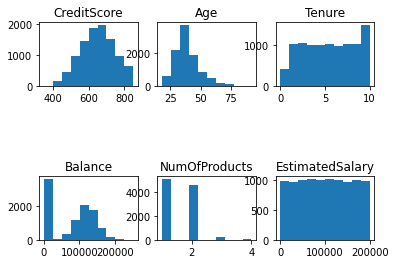

In [548]:
for i,j in column_dict.items():
  plt.subplot(i)
  plt.hist(df[j])
  plt.title(j)



In [549]:
# Scaling Estimated Salary
for i in range(len(X)):
    X['EstimatedSalary'][i]=(X['EstimatedSalary'][i]-X['EstimatedSalary'].min())/(X['EstimatedSalary'].max()-X['EstimatedSalary'].min())


In [550]:
X=X[X['NumOfProducts']!=3]
X=X[X['NumOfProducts']!=4]
X['NumOfProducts'].value_counts()

1    5084
2    4590
Name: NumOfProducts, dtype: int64

In [551]:
# scaling Number of products
X['NumOfProducts']=np.where(X['NumOfProducts']==2,1,0)
X.reset_index(drop=True,inplace=True)

In [555]:
list=['Balance','Tenure','Age']

for i in list:
  median = X[i].median()
  Q1 = np.percentile(X[i], 25, interpolation = 'midpoint')    
  Q3 = np.percentile(X[i], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1 
  for j in range(len(X)):
    X[i][j]=((X[i][j]-median)/IQR)

for i in range(len(X)):
  X['CreditScore'][i]=(X['CreditScore'][i]-X['CreditScore'].mean())/X['CreditScore'].std()

In [556]:
Y=X.iloc[:,-1]
X=X.iloc[:,:-1]

In [557]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
X['Geography']=Label.fit_transform(X['Geography'])
X['Gender']=Label.fit_transform(X['Gender'])

In [579]:
from sklearn.model_selection import train_test_split

X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.15,random_state=0)


In [580]:
from itertools import dropwhile
from keras.layers import Dropout
model=models.Sequential()


model.add(Dense(80,activation ='sigmoid',kernel_initializer='glorot_uniform'))
model.add(Dropout(0.4))
model.add(Dense(40,activation ='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(20,activation ='sigmoid',kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation ='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(2))




In [581]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [582]:
model.fit(X_train,Y_train,epochs=20,batch_size=10,validation_data=[X_test,Y_test])

Epoch 1/20
146/146 [==============================] - 3s 14ms/step - loss: nan - accuracy: 0.8292 - val_loss: nan - val_accuracy: 0.8165
Epoch 2/20
146/146 [==============================] - 2s 12ms/step - loss: nan - accuracy: 0.8292 - val_loss: nan - val_accuracy: 0.8165
Epoch 3/20
146/146 [==============================] - 3s 21ms/step - loss: nan - accuracy: 0.8292 - val_loss: nan - val_accuracy: 0.8165
Epoch 4/20
146/146 [==============================] - 2s 12ms/step - loss: nan - accuracy: 0.8292 - val_loss: nan - val_accuracy: 0.8165
Epoch 5/20
146/146 [==============================] - 2s 12ms/step - loss: nan - accuracy: 0.8292 - val_loss: nan - val_accuracy: 0.8165
Epoch 6/20
146/146 [==============================] - 2s 12ms/step - loss: nan - accuracy: 0.8292 - val_loss: nan - val_accuracy: 0.8165
Epoch 7/20
146/146 [==============================] - 2s 13ms/step - loss: nan - accuracy: 0.8292 - val_loss: nan - val_accuracy: 0.8165
Epoch 8/20
146/146 [=====================

In [584]:
model.evaluate(X_train,Y_train)

46/46 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8292


[nan, 0.8292011022567749]

In [585]:
model.evaluate(X_test,Y_test)

257/257 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.8165


[nan, 0.8164680004119873]